In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


#  Load the dataset

In [2]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#   Display the first few rows of the dataset
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
#Data exploration
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

# **Check if there is a null values**

# Handling Missing Values
Three ways :
1. Remove corresponding rows
1. Remove the column
1. Inputation : replace the missing value with some value like mean , median,mode of attribute.

In [5]:
data.isnull().values.any()

True

In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# 3- Figure out why the data is missing
**The total number of bedrooms has an empty value.****

In [8]:
data.total_bedrooms.isnull().any()

True

# Eliminating all extra variables.

In [9]:
#Handling missing values (if any)
data.dropna(inplace = True)
data.shape


(20433, 10)

In [10]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
columns_with_na_dropped.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
# just how much data did we lose?
print("Columns in original dataset: ", data.shape[1])
print("Columns with na's dropped: " , columns_with_na_dropped.shape[1])

Columns in original dataset:  10
Columns with na's dropped:  10


In [13]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [16]:
data.ocean_proximity = data.ocean_proximity.map({"<1H OCEAN":1,"INLAND":2,"NEAR OCEAN":3,"NEAR BAY":4,"ISLAND":5})

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


# Data Exploration

<Axes: xlabel='median_house_value', ylabel='Count'>

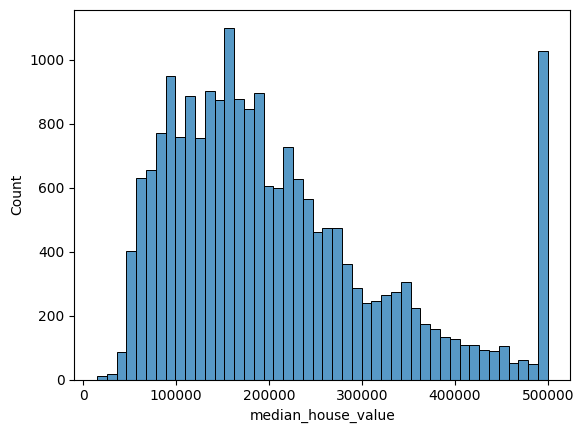

In [18]:



sns.histplot(data.median_house_value)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

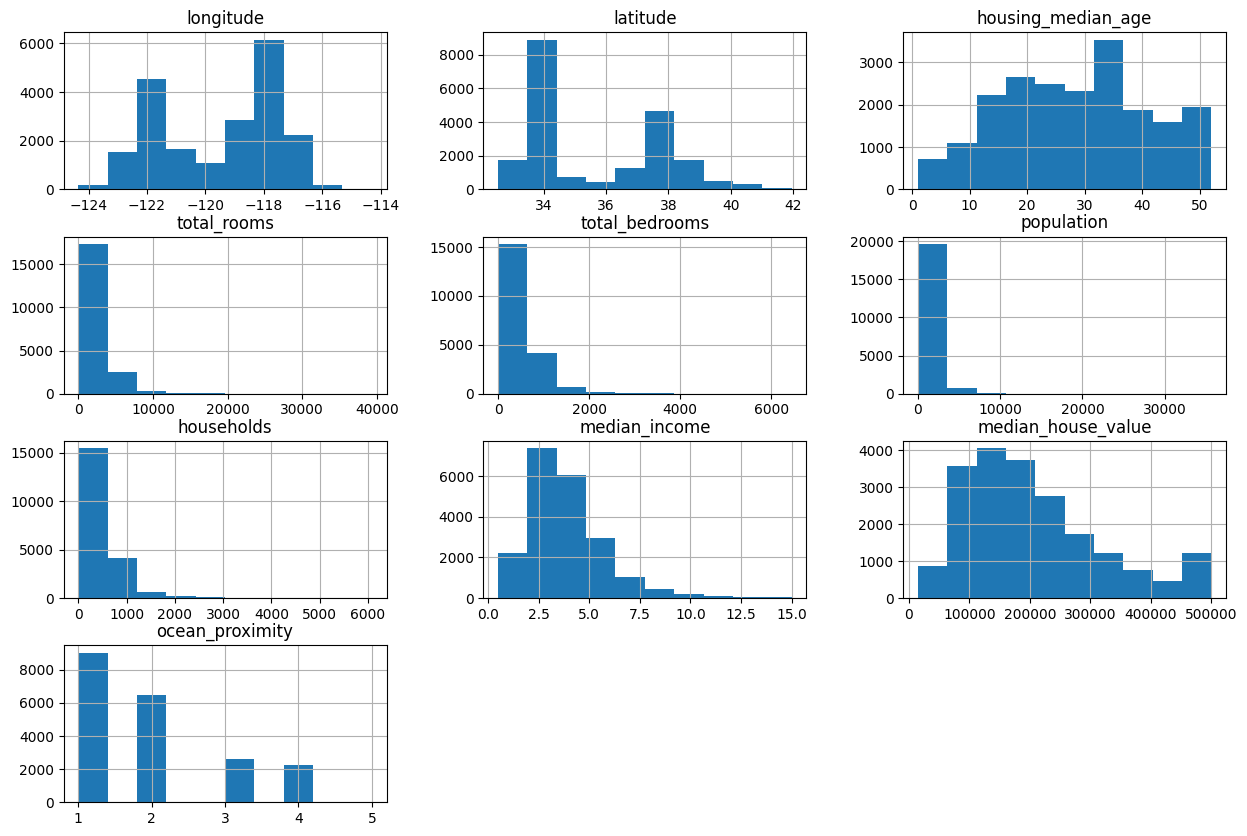

In [19]:
data.hist(figsize=(15,10))

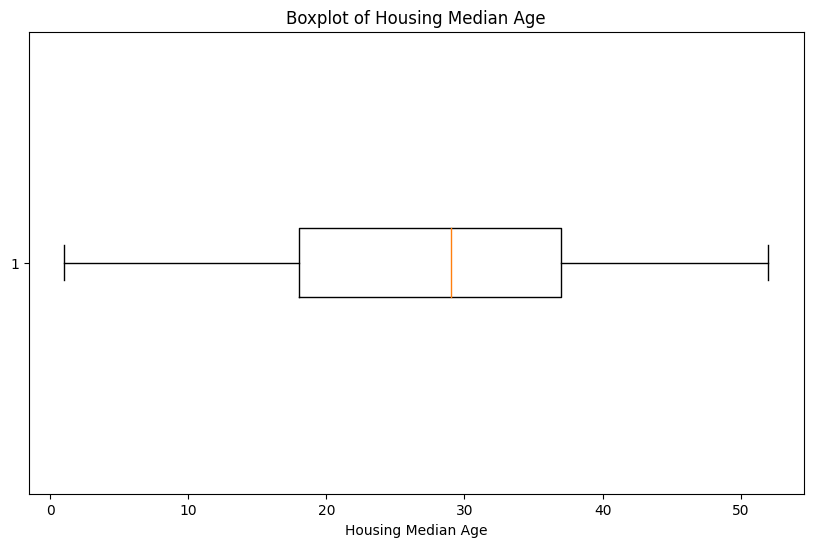

In [20]:
# Boxplot of housing_median_age
plt.figure(figsize=(10, 6))
plt.boxplot(data['housing_median_age'], vert=False)
plt.title('Boxplot of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.show()

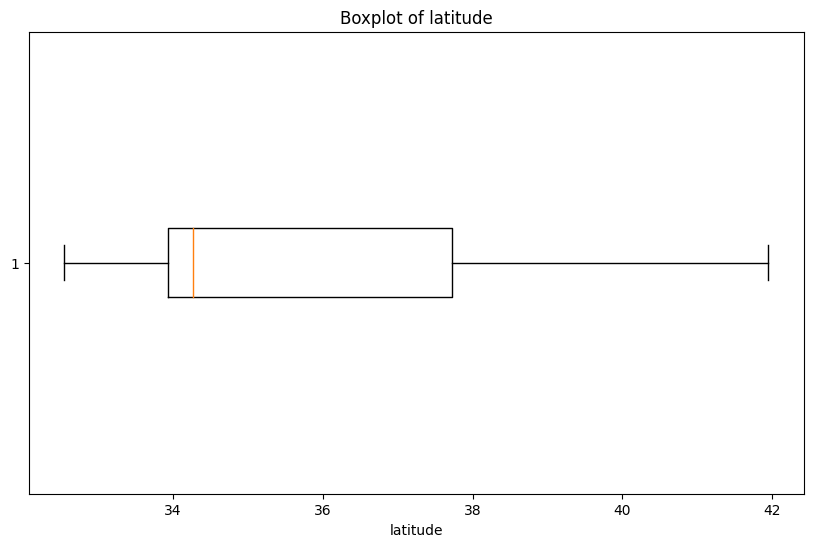

In [21]:
# Boxplot of housing_median_age
plt.figure(figsize=(10, 6))
plt.boxplot(data['latitude'], vert=False)
plt.title('Boxplot of latitude')
plt.xlabel('latitude')
plt.show()

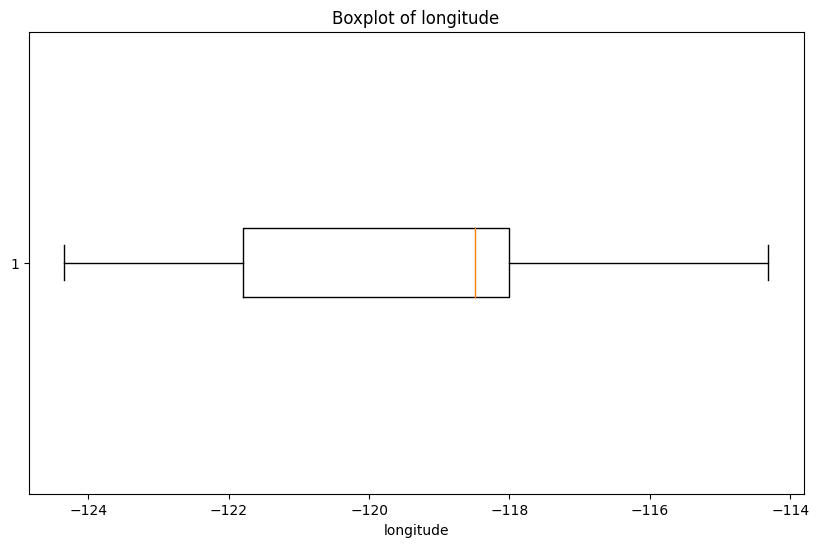

In [22]:
# Boxplot of housing_median_age
plt.figure(figsize=(10, 6))
plt.boxplot(data['longitude'], vert=False)
plt.title('Boxplot of longitude')
plt.xlabel('longitude')
plt.show()


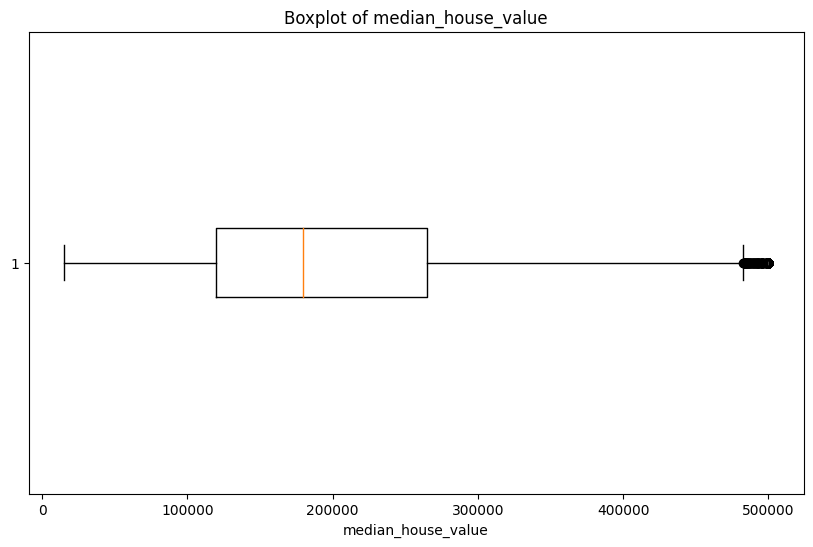

In [23]:
# Boxplot of housing_median_age
plt.figure(figsize=(10, 6))
plt.boxplot(data['median_house_value'], vert=False)
plt.title('Boxplot of median_house_value')
plt.xlabel('median_house_value')
plt.show()

<Axes: >

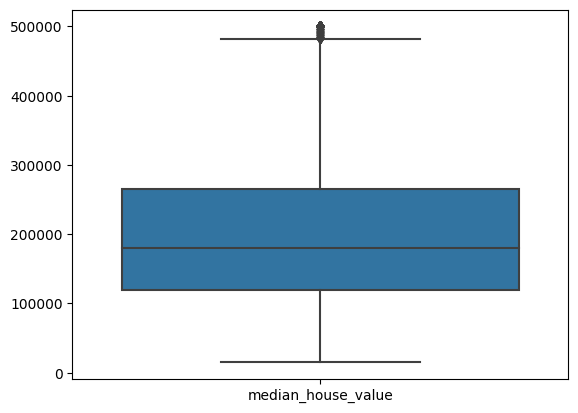

In [24]:
# Box Plot
import seaborn as sns
sns.boxplot(data[['median_house_value']])


In [25]:
# IQR
Q1 = np.percentile(data['median_house_value'], 25, method='midpoint')
Q3 = np.percentile(data['median_house_value'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

145200.0


In [26]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
print(upper,lower)

482500.0 -98300.0


In [27]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=list(np.where(data['median_house_value']>=upper))
print("upper Bound:",upper)
print(sum(upper_array))
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=list(np.where(data['median_house_value']<=lower))
print("Lower Bound:",lower)
print(sum(lower_array))


upper Bound: 482500.0
[   89   140   457 ... 20222 20231 20238]
Lower Bound: -98300.0
[]


<Axes: >

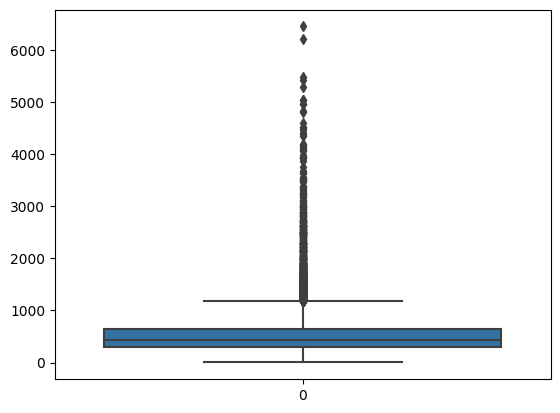

In [28]:
sns.boxplot(data['total_bedrooms'])
